In [20]:
import mglearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Pre-processing

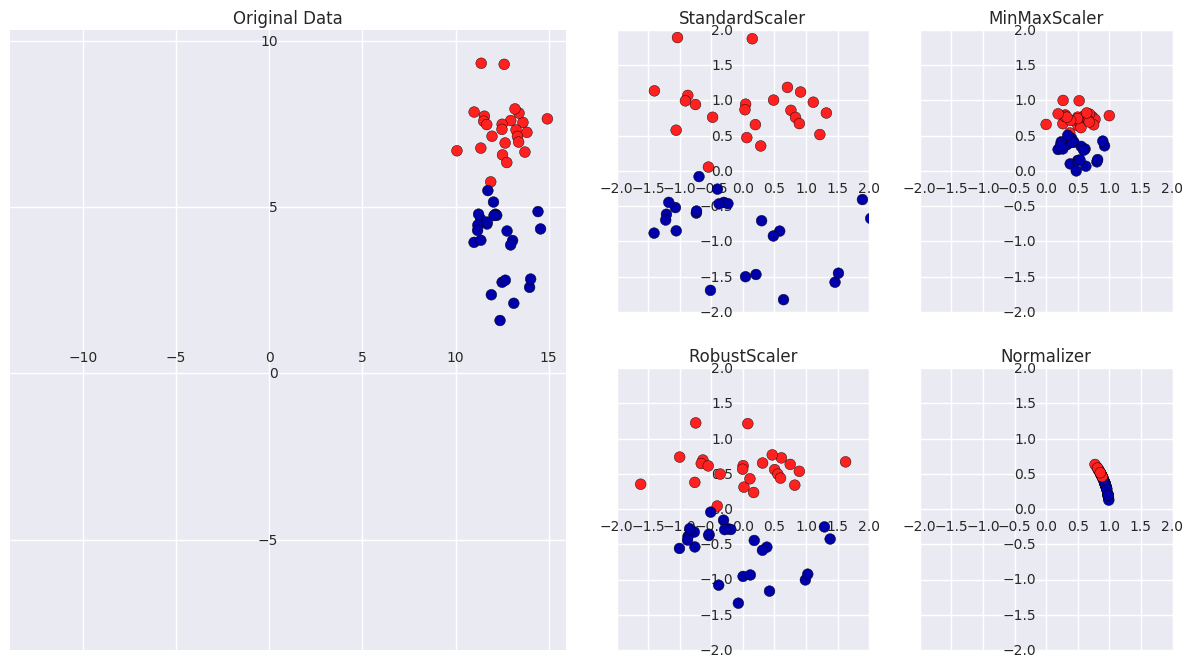

In [7]:
mglearn.plots.plot_scaling()

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, 
                                                    cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
# Transform data
X_train_scaled = scaler.transform(X_train)
# Print dataset properties before and after scaling
print("Transformed shape: {}".format(X_train_scaled.shape))
print("Per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("Per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("Per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("Per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))

# Transform test data
X_test_scaled = scaler.transform(X_test)

# Print test data properties after scaling
print("Per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("Per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

Transformed shape: (426, 30)
Per-feature minimum before scaling:
 [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
Per-feature maximum before scaling:
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+0

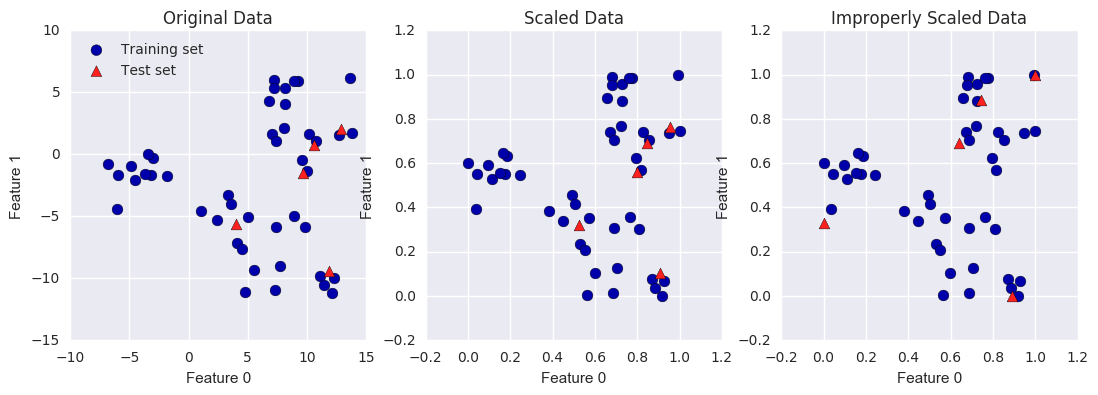

In [28]:
from sklearn.datasets import make_blobs
# Make synthetic data

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# Split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

# Plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), 
               label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', 
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', 
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# Rescale the test set separately
# So test set min is 0 and test set max is 1
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], 
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)

# Same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)

In [33]:
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

svm = SVC(C=100)
svm.fit(X_train, Y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, Y_test)))

Test set accuracy: 0.63


In [35]:
# Preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning an SVM on the scaled training data
svm.fit(X_train_scaled, Y_train)

# Scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, Y_test)))

Scaled test set accuracy: 0.97


In [37]:
# Preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning an SVM on the scaled training data
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, Y_test)))

SVM test accuracy: 0.95
